In [3]:
import numpy as np #Linear algera Library
import pandas as pd
import matplotlib.pyplot as plt #to plot graphs
import seaborn as sns #to plot graphs
sns.set() #setting seaborn as default 
import smote
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("airline-safety1.csv") 
data.head()

,Airlines,incidents_1985-99,fatal_accidents_1985-99,incidents_2000-14,fatal_accidents_2000-14,Safety
0,Aer Lingus,2,0,0,0,Yes
1,Aeroflot*,76,14,6,1,No
2,Aerolineas Argentinas,6,0,1,0,Yes
3,Aeromexico*,3,1,5,0,No
4,Air Canada,2,0,2,0,Yes


In [5]:
data['Safety'].unique

<bound method Series.unique of 0     Yes
1      No
2     Yes
3      No
4     Yes
5      No
6      No
7     Yes
8      No
9      No
10    Yes
11     No
12    Yes
13     No
14    Yes
15    Yes
16     No
17    Yes
18    Yes
19     No
20     No
21    Yes
22     No
23    Yes
24     No
25     No
26    Yes
27     No
28     No
29     No
30    Yes
31     No
32    Yes
33    Yes
34     No
35     No
36     No
37    Yes
38    Yes
39     No
40     No
41     No
42     No
43    Yes
44    Yes
45     No
46    Yes
47     No
48    Yes
49     No
50     No
51     No
52     No
53     No
54    Yes
55     No
Name: Safety, dtype: object>

<AxesSubplot:xlabel='Safety', ylabel='count'>

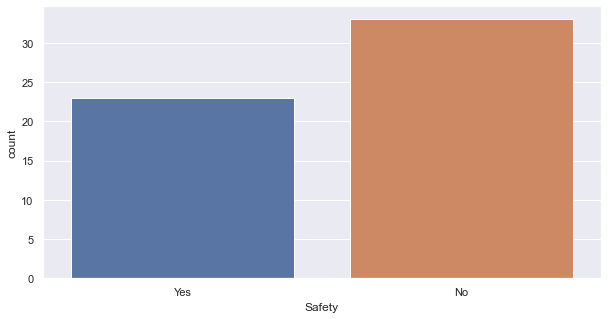

In [6]:
plt.figure(figsize=(10,5))
sns.countplot(x='Safety',data=data)

In [8]:
data.isnull().sum()

Airlines                   0
incidents_1985-99          0
fatal_accidents_1985-99    0
incidents_2000-14          0
fatal_accidents_2000-14    0
Safety                     0
dtype: int64

In [7]:
data.columns

Index(['Airlines', 'incidents_1985-99', 'fatal_accidents_1985-99',
       'incidents_2000-14', 'fatal_accidents_2000-14', 'Safety'],
      dtype='object')

In [8]:
x =data[['incidents_1985-99', 'fatal_accidents_1985-99','incidents_2000-14', 
'fatal_accidents_2000-14']]
y =data[['Safety']]

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, 
random_state=42)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
error_rate =[]
for i in range(1,25):
 knn=KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i=knn.predict(x_test)
 pred_i=pred_i.reshape(-1,1)
 error_rate.append(np.mean(pred_i != y_test))

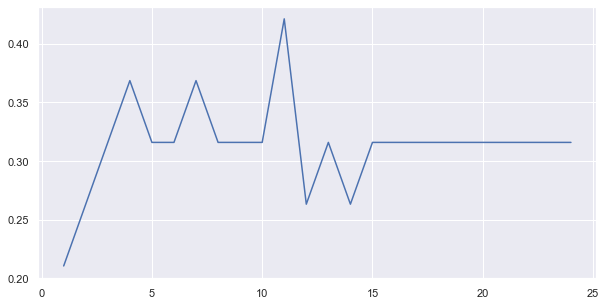

In [11]:
plt.figure(figsize=(10,5))
plt.plot(range(1,25),error_rate)

In [12]:
knn=KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [15]:
predictions=knn.predict(x_test)
predictions

array(['Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes',
       'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes', 'Yes', 'Yes'],
      dtype=object)

In [16]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[7 3]
 [2 7]]


In [17]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

          No       0.78      0.70      0.74        10
         Yes       0.70      0.78      0.74         9

    accuracy                           0.74        19
   macro avg       0.74      0.74      0.74        19
weighted avg       0.74      0.74      0.74        19

